In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("aggregated.json") as f:
    data = json.loads(f.read())

def used_custom_nore(d):
    custom = [s for s in d["whichdata"] if s == "custom" or s == "custom simulated"]
    return len(custom) == len(d["whichdata"]) and d["didpublish"] == "no" 

def used_custom_re(d):
    custom = [s for s in d["whichdata"] if s == "custom" or s == "custom simulated"]
    return len(custom) == len(d["whichdata"]) and d["didpublish"] != "no" and d["didpublish"] != ""

def used_any_benchmark(d):
    not_custom = [s for s in d["whichdata"] if s != "custom" and s != "custom simulated" and s != "phantom"]
    return len(not_custom) > 0
    
# Order was randomized, we did a bit too many, just select the first 100 from each year
even_dat = []
counts = [0 for i in range(5)]
for d in data:
    if used_custom_nore(d) or used_custom_re(d) or used_any_benchmark(d):
        year_ind = 2018 - int(d["year"])
        if counts[year_ind] < 100:
            even_dat = even_dat + [d]
            counts[year_ind] = counts[year_ind] + 1
            
data = even_dat

# Windsorize to 50 citations per year
for i, d in enumerate(data):
    if int(d["citations"])/(2019 - int(d["year"])) > 50:
        print("Windsorizing {} from {} to {} citations".format(d["ind"], data[i]["citations"], str(50*(2019 - int(d["year"])))))
        data[i]["citations"] = str(50*(2019 - int(d["year"])))

Windsorizing 37 from 731 to 150 citations
Windsorizing 481 from 236 to 200 citations


## How often are benchmarks not cited?

In [3]:
ub = 0
ubnc = 0
for d in data:
    if used_any_benchmark(d):
        ub = ub + 1
        if d["didcite"] != "all" and d["didcite"] != "":
            ubnc = ubnc + 1
        if d["didcite"] == "":
            print(d["ind"], "needs filling")
            print(json.dumps(d, indent=2))
            
print(ub, "papers found that used a benchmark")
print(ubnc, "of those missed or improperly cited at least one of those benchmarks")
print("That's {:0.1f} per cent!".format(100*ubnc/ub))

217 papers found that used a benchmark
45 of those missed or improperly cited at least one of those benchmarks
That's 20.7 per cent!


## How often is custom data used?

In [4]:
def used_any_custom_data(d):
    not_custom = [s for s in d["whichdata"] if s == "custom" or s == "custom simulated"]
    return len(not_custom) > 0


def did_release_data(d):
    return d["didpublish"] != "no" and d["didpublish"] != ""
    

du = 0
dure = 0
for d in data:
    if used_any_custom_data(d):
        du = du + 1
        if did_release_data(d):
            dure = dure + 1
            
print(du, "papers found that used custom data")
print(dure, "of those released or promised to release their data")
print("That's {:0.1f} per cent!".format(100*dure/du))

309 papers found that used custom data
15 of those released or promised to release their data
That's 4.9 per cent!


In [5]:
du = 0
dure = 0
for d in data:
    if used_any_custom_data(d) and used_any_benchmark(d):
        du = du + 1
        if d["didpublish"] != "no" and d["didpublish"] != "":
            dure = dure + 1
            
print(du, "papers found that used custom and benchmark data")
print(dure, "of those released or promised to release their data")
print("That's {:0.1f} per cent!".format(100*dure/du))

27 papers found that used custom and benchmark data
3 of those released or promised to release their data
That's 11.1 per cent!


## How often are MICCAI papers cited?

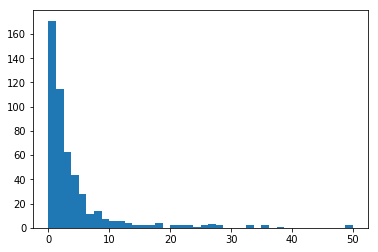

4.0842


In [6]:
citations = []
for d in data:
    try:
        citations = citations + [int(d["citations"])/(2019 - int(d["year"]))]
    except ValueError:
        print(d["ind"], "needs reviewing")
            
cits = np.sort(np.array(citations))
plt.hist(cits, bins=40)
plt.show()
print(np.mean(cits))

## What if we partition by benchmark vs custom?

Excluding... []
Total: 229
5.426346433770015


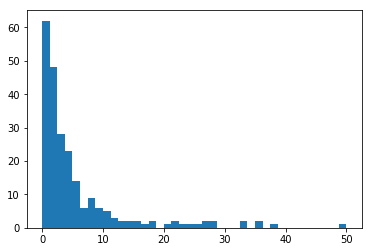



Excluding... []
Total: 271
2.950061500615006


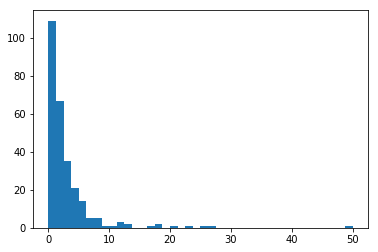



Excluding... []
Total: 15
8.981111111111112


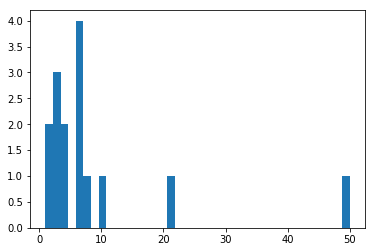

In [7]:
bnch_citations = []
cstm_citations = []
csre_citations = []
for d in data:
    if used_any_benchmark(d) or used_custom_re(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
    elif used_custom_nore(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
    if used_any_custom_data(d) and did_release_data(d):
        try:
            csre_citations = csre_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")

            
# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
print("Excluding...", bnch_cits[bnch_cits > 100])
print("Total:", bnch_cits[bnch_cits <= 100].shape[0])
print(np.mean(bnch_cits[bnch_cits <= 100]))
plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
plt.show()

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
print("Excluding...", cstm_cits[cstm_cits > 100])
print("Total:", cstm_cits[cstm_cits <= 100].shape[0])
print(np.mean(cstm_cits[cstm_cits <= 100]))
plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
plt.show()

print("\n")
# Then custom and release
csre_cits = np.sort(np.array(csre_citations))
print("Excluding...", csre_cits[csre_cits > 100])
print("Total:", csre_cits[csre_cits <= 100].shape[0])
print(np.mean(csre_cits[csre_cits <= 100]))
plt.hist(csre_cits[csre_cits <= 100], bins=40)
plt.show()


## What if we partition by releasing code or no?

Excluding... []
Total: 36
8.883333333333333


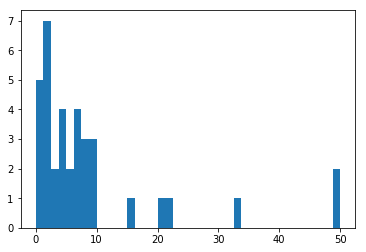



Excluding... []
Total: 464
3.711853448275862


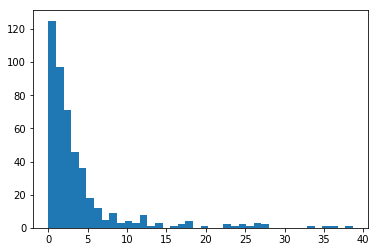

In [8]:
def released_code(d):
    return d["code"] == "on"

bnch_citations = []
cstm_citations = []
for d in data:
    if released_code(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
    else:
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")

            
# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
print("Excluding...", bnch_cits[bnch_cits > 100])
print("Total:", bnch_cits[bnch_cits <= 100].shape[0])
print(np.mean(bnch_cits[bnch_cits <= 100]))
plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
plt.show()

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
print("Excluding...", cstm_cits[cstm_cits > 100])
print("Total:", cstm_cits[cstm_cits <= 100].shape[0])
print(np.mean(cstm_cits[cstm_cits <= 100]))
plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
plt.show()


## What if we partition by open access vs no?

Excluding... []
Total: 390
4.771452991452993


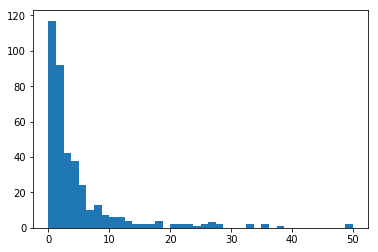



Excluding... []
Total: 110
1.6475757575757572


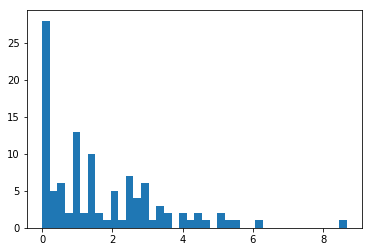

In [9]:
def open_access(d):
    return "on" in d["preprint"] + d["personal"]

bnch_citations = []
cstm_citations = []
for d in data:
    if open_access(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
    else:
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")

            
# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
print("Excluding...", bnch_cits[bnch_cits > 100])
print("Total:", bnch_cits[bnch_cits <= 100].shape[0])
print(np.mean(bnch_cits[bnch_cits <= 100]))
plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
plt.show()

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
print("Excluding...", cstm_cits[cstm_cits > 100])
print("Total:", cstm_cits[cstm_cits <= 100].shape[0])
print(np.mean(cstm_cits[cstm_cits <= 100]))
plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
plt.show()


## How's public benchmark use over time?

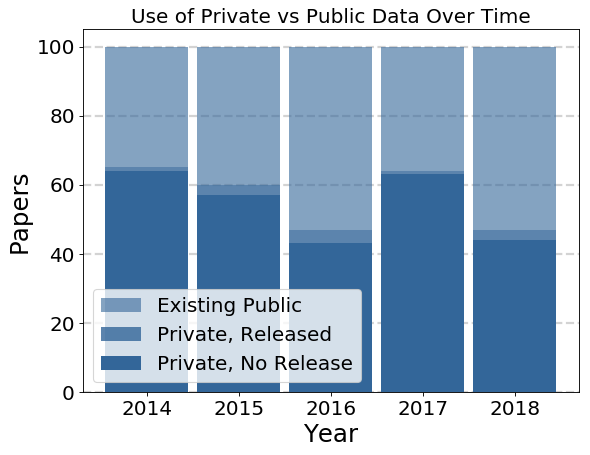

2014 0.36 100
2015 0.43 100
2016 0.57 100
2017 0.37 100
2018 0.56 100


In [19]:
bnch_counts = [0 for _ in range(5)]
cstm_counts = [0 for _ in range(5)]
csre_counts = [0 for _ in range(5)]

for d in data:
    year = 4 - 2018 + int(d["year"])
    if used_any_benchmark(d):
        try:
            bnch_counts[year] = bnch_counts[year] + 1
        except ValueError:
            print(d["ind"], "needs reviewing")
    elif used_custom_nore(d):
        try:
            cstm_counts[year] = cstm_counts[year] + 1
        except ValueError:
            print(d["ind"], "needs reviewing")
    elif used_custom_re(d):
        try:
            csre_counts[year] = csre_counts[year] + 1
        except ValueError:
            print(d["ind"], "needs reviewing")

years = range(2014, 2019)

# Formatting this plot
SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.grid(linestyle='--', linewidth=2, c="lightgrey", axis="y")

plt.bar(years, bnch_counts, 0.9, bottom=np.array(cstm_counts) + np.array(csre_counts), color=(0.2, 0.4, 0.6, 0.6))
plt.bar(years, csre_counts, 0.9, bottom=cstm_counts, color=(0.2, 0.4, 0.6, 0.8))
plt.bar(years, cstm_counts, 0.9, color=(0.2, 0.4, 0.6, 1.0))
plt.legend(["Existing Public", "Private, Released", "Private, No Release"], loc="lower left")
plt.xlabel("Year")
plt.ylabel("Papers")
plt.title("Use of Private vs Public Data Over Time")

plt.rc('axes', axisbelow=True)

plt.show()

for i in range(5):
    print(years[i], (bnch_counts[i]+csre_counts[i])/(bnch_counts[i]+cstm_counts[i]+csre_counts[i]), bnch_counts[i]+cstm_counts[i]+csre_counts[i])


## How's code release over time?

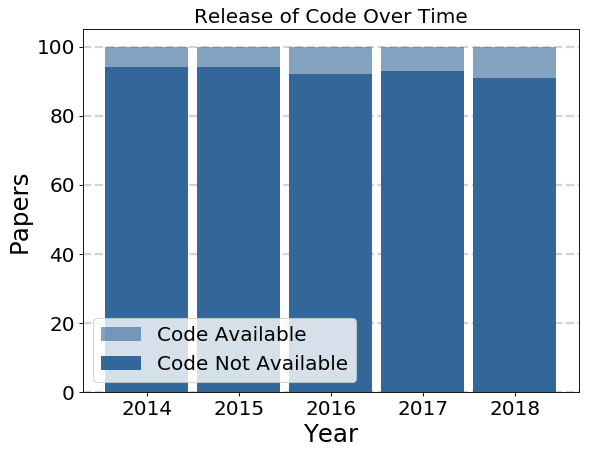

2014 0.06
2015 0.06
2016 0.08
2017 0.07
2018 0.09


In [11]:
bnch_counts = [0 for _ in range(5)]
cstm_counts = [0 for _ in range(5)]

for d in data:
    year = 4 - 2018 + int(d["year"])
    #if not used_custom_data(d) and not used_any_benchmark(d):
    #    continue
    if released_code(d):
        try:
            bnch_counts[year] = bnch_counts[year] + 1
        except ValueError:
            print(d["ind"], "needs reviewing")
    else:
        try:
            cstm_counts[year] = cstm_counts[year] + 1
        except ValueError:
            print(d["ind"], "needs reviewing")

            

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.grid(linestyle='--', linewidth=2, c="lightgrey", axis="y")
years = range(2014, 2019)
plt.bar(years, bnch_counts, 0.9, bottom=cstm_counts, color=(0.2, 0.4, 0.6, 0.6))
plt.bar(years, cstm_counts, 0.9, color=(0.2, 0.4, 0.6, 1.0))
plt.legend(["Code Available", "Code Not Available", "Benchmark"], loc="lower left")
plt.xlabel("Year")
plt.ylabel("Papers")
plt.title("Release of Code Over Time")
plt.show()

for i in range(5):
    print(years[i], bnch_counts[i]/(bnch_counts[i]+cstm_counts[i]))

# How's data release over time?

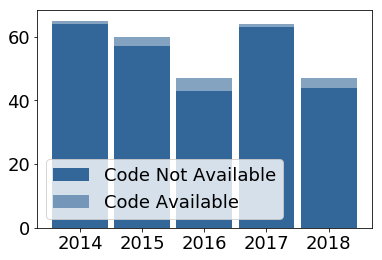

2014 0.015384615384615385
2015 0.05
2016 0.0851063829787234
2017 0.015625
2018 0.06382978723404255


In [12]:
bnch_counts = [0 for _ in range(5)]
cstm_counts = [0 for _ in range(5)]

for d in data:
    year = 4 - 2018 + int(d["year"])
    if used_custom_re(d):
        try:
            bnch_counts[year] = bnch_counts[year] + 1
        except ValueError:
            print(d["ind"], "needs reviewing")
    elif used_custom_nore(d):
        try:
            cstm_counts[year] = cstm_counts[year] + 1
        except ValueError:
            print(d["ind"], "needs reviewing")

years = range(2014, 2019)
plt.bar(years, cstm_counts, 0.9, color=(0.2, 0.4, 0.6, 1.0))
plt.bar(years, bnch_counts, 0.9, bottom=cstm_counts, color=(0.2, 0.4, 0.6, 0.6))
plt.legend(["Code Not Available", "Code Available", "Benchmark"], loc="lower left")
plt.show()

for i in range(5):
    print(years[i], bnch_counts[i]/(bnch_counts[i]+cstm_counts[i]))

## Fieller's method seems like the best choice given the distributions

In [13]:
print("OPEN ACCESS AND CODE RELEASE")

agg_rat = 0
N = 0
strata_bnch_chars = []
strata_cstm_chars = []

bnch_citations = []
cstm_citations = []
strt_citations = []
n = 0
for d in [d for d in data if open_access(d) and released_code(d)]:
    if used_any_benchmark(d) or used_custom_re(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1
    elif used_custom_nore(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1


print("Public")
# First benchmark
bnch_cits = np.array(bnch_citations)
# print("Excluding...", bnch_cits[bnch_cits > 100])
print("N:", bnch_cits.shape[0])
print("M:", np.mean(bnch_cits))
print("S:", np.std(bnch_cits))
# plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
# plt.show()

print()
print("Private")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
# print("Excluding...", cstm_cits[cstm_cits > 100])
print("N:", cstm_cits.shape[0])
print("M:", np.mean(cstm_cits))
print("S:", np.std(cstm_cits))
# plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
# plt.show()

rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
agg_rat = agg_rat + n*rat
N = N + n
print()
print("Ratio:", rat)

strata_bnch_chars = strata_bnch_chars + [[bnch_cits.shape[0], np.mean(bnch_cits), np.std(bnch_cits)]]
strata_cstm_chars = strata_cstm_chars + [[cstm_cits.shape[0], np.mean(cstm_cits), np.std(cstm_cits)]]

print("\n")
print("OPEN ACCESS AND NO CODE RELEASE")

bnch_citations = []
cstm_citations = []
n = 0
for d in [d for d in data if open_access(d) and not released_code(d)]:
    if used_any_benchmark(d) or used_custom_re(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1
    elif used_custom_nore(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1

            
print("Public")
# First benchmark
bnch_cits = np.array(bnch_citations)
# print("Excluding...", bnch_cits[bnch_cits > 100])
print("N:", bnch_cits.shape[0])
print("M:", np.mean(bnch_cits))
print("S:", np.std(bnch_cits))
# plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
# plt.show()

print()
print("Private")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
# print("Excluding...", cstm_cits[cstm_cits > 100])
print("N:", cstm_cits.shape[0])
print("M:", np.mean(cstm_cits))
print("S:", np.std(cstm_cits))
# plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
# plt.show()

rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
agg_rat = agg_rat + n*rat
N = N + n
print()
print("Ratio:", rat)

strata_bnch_chars = strata_bnch_chars + [[bnch_cits.shape[0], np.mean(bnch_cits), np.std(bnch_cits)]]
strata_cstm_chars = strata_cstm_chars + [[cstm_cits.shape[0], np.mean(cstm_cits), np.std(cstm_cits)]]


print("\n")
print("NOT OPEN ACCESS AND CODE RELEASE")

bnch_citations = []
cstm_citations = []
n = 0
for d in [d for d in data if not open_access(d) and released_code(d)]:
    if used_any_benchmark(d) or used_custom_re(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1
    elif used_custom_nore(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1

            
print("Public")
# First benchmark
bnch_cits = np.array(bnch_citations)
# print("Excluding...", bnch_cits[bnch_cits > 100])
print("N:", bnch_cits.shape[0])
print("M:", np.mean(bnch_cits))
print("S:", np.std(bnch_cits))
# plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
# plt.show()

print()
print("Private")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
# print("Excluding...", cstm_cits[cstm_cits > 100])
print("N:", cstm_cits.shape[0])
print("M:", np.mean(cstm_cits))
print("S:", np.std(cstm_cits))
# plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
# plt.show()

rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
agg_rat = agg_rat + n*rat
N = N + n
print()
print("Ratio:", rat)

strata_bnch_chars = strata_bnch_chars + [[bnch_cits.shape[0], np.mean(bnch_cits), np.std(bnch_cits)]]
strata_cstm_chars = strata_cstm_chars + [[cstm_cits.shape[0], np.mean(cstm_cits), np.std(cstm_cits)]]


print("\n")
print("NOT OPEN ACCESS AND NO CODE RELEASE")

bnch_citations = []
cstm_citations = []
n = 0
for d in [d for d in data if not open_access(d) and not released_code(d)]:
    if used_any_benchmark(d) or used_custom_re(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1
    elif used_custom_nore(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1

            
print("Public")
# First benchmark
bnch_cits = np.array(bnch_citations)
# print("Excluding...", bnch_cits[bnch_cits > 100])
print("N:", bnch_cits.shape[0])
print("M:", np.mean(bnch_cits))
print("S:", np.std(bnch_cits))
# plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
# plt.show()

print()
print("Private")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
# print("Excluding...", cstm_cits[cstm_cits > 100])
print("N:", cstm_cits.shape[0])
print("M:", np.mean(cstm_cits))
print("S:", np.std(cstm_cits))
# plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
# plt.show()

rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
agg_rat = agg_rat + n*rat
N = N + n
print()
print("Ratio:", rat)

strata_bnch_chars = strata_bnch_chars + [[bnch_cits.shape[0], np.mean(bnch_cits), np.std(bnch_cits)]]
strata_cstm_chars = strata_cstm_chars + [[cstm_cits.shape[0], np.mean(cstm_cits), np.std(cstm_cits)]]

print("\n")
print(
    "RATIO AFTER CONTROLLING:", 
    agg_rat/N
)

OPEN ACCESS AND CODE RELEASE
Public
N: 22
M: 10.787878787878787
S: 11.321510301212427

Private
N: 8
M: 9.425
S: 15.447228715857095

Ratio: 1.1446025239128685


OPEN ACCESS AND NO CODE RELEASE
Public
N: 167
M: 5.561676646706586
S: 7.658937680716954

Private
N: 193
M: 3.208981001727116
S: 4.418110846520646

Ratio: 1.733159730055497


NOT OPEN ACCESS AND CODE RELEASE
Public
N: 5
M: 1.1466666666666665
S: 0.9270263091076638

Private
N: 1
M: 1.3333333333333333
S: 0.0

Ratio: 0.8599999999999999


NOT OPEN ACCESS AND NO CODE RELEASE
Public
N: 35
M: 2.021904761904762
S: 2.1068436160939275

Private
N: 69
M: 1.4985507246376812
S: 1.4079963125616046

Ratio: 1.3492401215805472


RATIO AFTER CONTROLLING: 1.6075131023634834


In [14]:
print(strata_bnch_chars)
print(strata_cstm_chars)
print("Shoot... my means are too close to zero to use Fieller's method :(")

[[22, 10.787878787878787, 11.321510301212427], [167, 5.561676646706586, 7.658937680716954], [5, 1.1466666666666665, 0.9270263091076638], [35, 2.021904761904762, 2.1068436160939275]]
[[8, 9.425, 15.447228715857095], [193, 3.208981001727116, 4.418110846520646], [1, 1.3333333333333333, 0.0], [69, 1.4985507246376812, 1.4079963125616046]]
Shoot... my means are too close to zero to use Fieller's method :(


## Fuck it, I'm using the Bootstrap

In [15]:
def get_stratafied_ratio(fata):
    #print("OPEN ACCESS AND CODE RELEASE")

    agg_rat = 0
    N = 0
    strata_bnch_chars = []
    strata_cstm_chars = []

    bnch_citations = []
    cstm_citations = []
    strt_citations = []
    n = 0
    for d in [d for d in fata if open_access(d) and released_code(d)]:
        if used_any_benchmark(d) or used_custom_re(d):
            try:
                bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
            except ValueError:
                print(d["ind"], "needs reviewing")
            n = n + 1
        elif used_custom_nore(d):
            try:
                cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
            except ValueError:
                print(d["ind"], "needs reviewing")
            n = n + 1


    #print("Public")
    # First benchmark
    bnch_cits = np.array(bnch_citations)
    # print("Excluding...", bnch_cits[bnch_cits > 100])
    #print("N:", bnch_cits.shape[0])
    #print("M:", np.mean(bnch_cits))
    #print("S:", np.std(bnch_cits))
    # plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
    # plt.show()

    #print()
    #print("Private")
    # Then custom no release
    cstm_cits = np.sort(np.array(cstm_citations))
    # print("Excluding...", cstm_cits[cstm_cits > 100])
    #print("N:", cstm_cits.shape[0])
    #print("M:", np.mean(cstm_cits))
    #print("S:", np.std(cstm_cits))
    # plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
    # plt.show()

    rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
    agg_rat = agg_rat + n*rat
    N = N + n
    #print()
    #print("Ratio:", rat)

    strata_bnch_chars = strata_bnch_chars + [[bnch_cits.shape[0], np.mean(bnch_cits), np.std(bnch_cits)]]
    strata_cstm_chars = strata_cstm_chars + [[cstm_cits.shape[0], np.mean(cstm_cits), np.std(cstm_cits)]]

    #print("\n")
    #print("OPEN ACCESS AND NO CODE RELEASE")

    bnch_citations = []
    cstm_citations = []
    n = 0
    for d in [d for d in fata if open_access(d) and not released_code(d)]:
        if used_any_benchmark(d) or used_custom_re(d):
            try:
                bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
            except ValueError:
                print(d["ind"], "needs reviewing")
            n = n + 1
        elif used_custom_nore(d):
            try:
                cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
            except ValueError:
                print(d["ind"], "needs reviewing")
            n = n + 1


    #print("Public")
    # First benchmark
    bnch_cits = np.array(bnch_citations)
    # print("Excluding...", bnch_cits[bnch_cits > 100])
    #print("N:", bnch_cits.shape[0])
    #print("M:", np.mean(bnch_cits))
    #print("S:", np.std(bnch_cits))
    # plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
    # plt.show()

    #print()
    #print("Private")
    # Then custom no release
    cstm_cits = np.sort(np.array(cstm_citations))
    # print("Excluding...", cstm_cits[cstm_cits > 100])
    #print("N:", cstm_cits.shape[0])
    #print("M:", np.mean(cstm_cits))
    #print("S:", np.std(cstm_cits))
    # plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
    # plt.show()

    rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
    agg_rat = agg_rat + n*rat
    N = N + n
    #print()
    #print("Ratio:", rat)

    strata_bnch_chars = strata_bnch_chars + [[bnch_cits.shape[0], np.mean(bnch_cits), np.std(bnch_cits)]]
    strata_cstm_chars = strata_cstm_chars + [[cstm_cits.shape[0], np.mean(cstm_cits), np.std(cstm_cits)]]


    #print("\n")
    #print("NOT OPEN ACCESS AND CODE RELEASE")

    bnch_citations = []
    cstm_citations = []
    n = 0
    for d in [d for d in fata if not open_access(d) and released_code(d)]:
        if used_any_benchmark(d) or used_custom_re(d):
            try:
                bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
            except ValueError:
                print(d["ind"], "needs reviewing")
            n = n + 1
        elif used_custom_nore(d):
            try:
                cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
            except ValueError:
                print(d["ind"], "needs reviewing")
            n = n + 1

    #print("Public")
    # First benchmark
    bnch_cits = np.array(bnch_citations)
    # print("Excluding...", bnch_cits[bnch_cits > 100])
    #print("N:", bnch_cits.shape[0])
    #print("M:", np.mean(bnch_cits))
    #print("S:", np.std(bnch_cits))
    # plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
    # plt.show()

    #print()
    #print("Private")
    # Then custom no release
    cstm_cits = np.sort(np.array(cstm_citations))
    # print("Excluding...", cstm_cits[cstm_cits > 100])
    #print("N:", cstm_cits.shape[0])
    #print("M:", np.mean(cstm_cits))
    #print("S:", np.std(cstm_cits))
    # plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
    # plt.show()

    rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
    agg_rat = agg_rat + n*rat
    N = N + n
    #print()
    #print("Ratio:", rat)

    strata_bnch_chars = strata_bnch_chars + [[bnch_cits.shape[0], np.mean(bnch_cits), np.std(bnch_cits)]]
    strata_cstm_chars = strata_cstm_chars + [[cstm_cits.shape[0], np.mean(cstm_cits), np.std(cstm_cits)]]


    #print("\n")
    #print("NOT OPEN ACCESS AND NO CODE RELEASE")

    bnch_citations = []
    cstm_citations = []
    n = 0
    for d in [d for d in fata if not open_access(d) and not released_code(d)]:
        if used_any_benchmark(d) or used_custom_re(d):
            try:
                bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
            except ValueError:
                print(d["ind"], "needs reviewing")
            n = n + 1
        elif used_custom_nore(d):
            try:
                cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
            except ValueError:
                print(d["ind"], "needs reviewing")
            n = n + 1

    #print("Public")
    # First benchmark
    bnch_cits = np.array(bnch_citations)
    # print("Excluding...", bnch_cits[bnch_cits > 100])
    #print("N:", bnch_cits.shape[0])
    #print("M:", np.mean(bnch_cits))
    #print("S:", np.std(bnch_cits))
    # plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
    # plt.show()

    #print()
    #print("Private")
    # Then custom no release
    cstm_cits = np.sort(np.array(cstm_citations))
    # print("Excluding...", cstm_cits[cstm_cits > 100])
    #print("N:", cstm_cits.shape[0])
    #print("M:", np.mean(cstm_cits))
    #print("S:", np.std(cstm_cits))
    # plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
    # plt.show()

    rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
    agg_rat = agg_rat + n*rat
    N = N + n
    #print()
    #print("Ratio:", rat)

    strata_bnch_chars = strata_bnch_chars + [[bnch_cits.shape[0], np.mean(bnch_cits), np.std(bnch_cits)]]
    strata_cstm_chars = strata_cstm_chars + [[cstm_cits.shape[0], np.mean(cstm_cits), np.std(cstm_cits)]]

    #print("\n")
    #print(
    #    "RATIO AFTER CONTROLLING:", 
    #    agg_rat/N
    #)
    return agg_rat/N

/home/helle246/envs/kcc8/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/helle246/envs/kcc8/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/helle246/envs/kcc8/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/helle246/envs/kcc8/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/helle246/envs/kcc8/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


31539


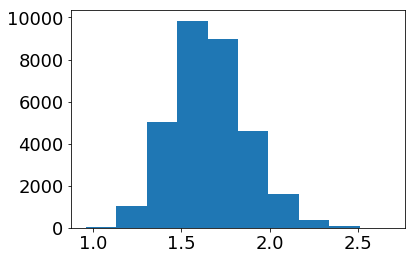

1.2808365576334828 2.10153068032326


In [16]:
rats = []
for i in range(50000):
    inds = np.random.randint(0, len(data), 500)
    fat = [data[i] for i in inds]
    rats = rats + [get_stratafied_ratio(fat)]

rats = [r for r in rats if not np.isnan(r)]
print(len(rats))
plt.hist(rats)
plt.show()
rats = np.array(rats)
print(np.percentile(rats, 2.5), np.percentile(rats, 97.5))

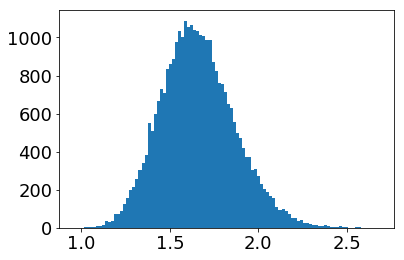

In [17]:
plt.hist(rats, bins=100)
plt.show()

## Now let's look at the cases where authors failed to cite. How many are their fault?

In [18]:
inds_false_alarm = [
    5, # ADNI is an author on one of the papers... odd
    86, # Not obvious at first but they got it
    87, # I goofed on this one. CGAN -> TCGA
    138, # This one was cited properly, but not next to the data intro
    202, # ADNI really doesn't make this easy...
    236, # Paper wasn't listed by HCP but it does seem to check out otherwise...
    251, # Again, weird place for the citation but it checks out,
    252, # another not on the approved list, but it checks out
    261, # another unintuitive placement
    285, # Oof, that one was pretty clear
    286, # Oof, this one was pretty clear too. They had a whole table with citations. Also, hi Veronika!
    401, # An older ADNI review, and not explicitly listed, but I'll take it
    490, # BrainWeb is a phantom company, not a public benchmark
    494, # These guys did EVERYTHING right
    505, # This was REALLY down there and hard to find
    562 # Same as above
]
inds_not_their_fault = [
    44, # MyConnectome project has no way to cite it
    151, # No clear way to cite MIVIA HEp-2
    156, # Same as above
    309, # Challenge manuscript came out two months too late
    355, # No clear way to cite MIVIA HEp-2
    362, # Unclear if what they give is a reference? Doesn't look like an indexed object, whatever it is
    391, # SpineWeb didn't have anything to cite at that time
    408, # Kaggle Diabetic Retinopathy Detection has no citation instructions
    516, # Stanford voldata doesn't give instructions to cite this dataset
    522, # Challenge manuscript wasn't out yet
    550 # Challenge manuscript wasn't out yet
]
lol = [
    45, # The last author is on one of the papers they should have cited!!!!
    49, # The challenge paper was out Oct. 2017, the MICCAI 2018 deadline was Mar. 2018. Sux
    52, # Flagrant footnote when there's a super obvious paper
    54, # Same as 49
    128, # Challenge paper
    295, # Did they mean ADNI? I'm so confused
    432 # Now that challenge paper was hard to find, but it exists, and should have been cited
]


ub = 0
ubnc = 0
ubncnf = 0
for d in data:
    if used_any_benchmark(d):
        ub = ub + 1
        if d["didcite"] != "all" and d["didcite"] != "" and int(d["ind"]) not in inds_false_alarm:
            ubnc = ubnc + 1
            if int(d["ind"]) in inds_not_their_fault:
                ubncnf = ubncnf + 1
            #print(json.dumps(d, indent=2))

print(ub, ubnc, ubncnf)

217 45 11
